In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from IPython.display import HTML
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')



In [2]:
import seaborn as sns


In [4]:
# from google.colab import files
# first_data = files.upload()
# second_data = files.upload()

calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [5]:
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [6]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [7]:
exercise_df = exercise.merge(calories, on="User_ID")
exercise_df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [8]:
print("This dataset has ", exercise_df.shape[0], " instances and ", exercise_df.shape[1], " columns.")

# Output: This dataset has 15000 instances and 9 columns.


This dataset has  15000  instances and  9  columns.


In [9]:
exercise_df.columns


Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [10]:
print("Columns : ")
for i, column in zip(range(len(exercise_df.columns)), exercise_df.columns):
    print("\t", i+1, ".", column)

Columns : 
	 1 . User_ID
	 2 . Gender
	 3 . Age
	 4 . Height
	 5 . Weight
	 6 . Duration
	 7 . Heart_Rate
	 8 . Body_Temp
	 9 . Calories


In [11]:
exercise_df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

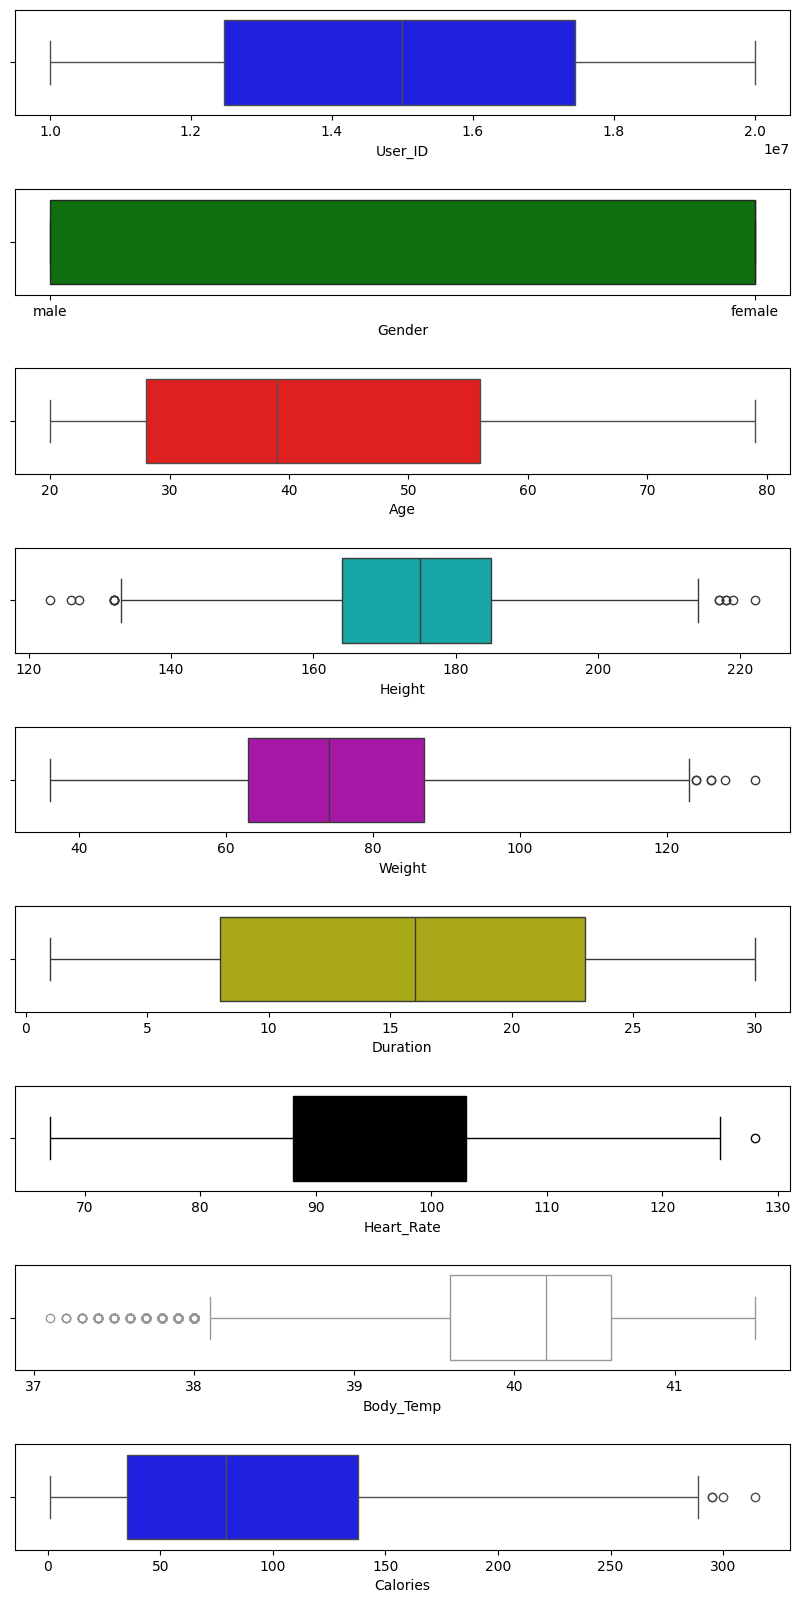

In [12]:
c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']
fig1, axes = plt.subplots(len(exercise_df.columns), 1, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
axes = axes.flatten()  # for using axes indices with one dimension array instead of two dimensions

for i, column in zip(range(len(exercise_df.columns)), exercise_df.columns):
    try:
        sns.boxplot(data=exercise_df, x=column, color=c[i], ax=axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

In [13]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: >

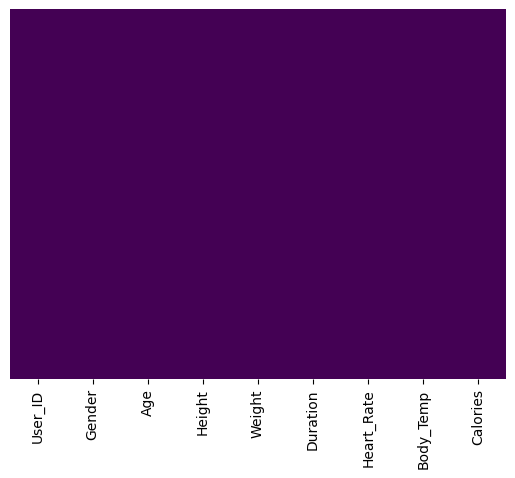

In [14]:
sns.heatmap(exercise_df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [15]:
print("The shape of dataset before dropping duplicates : ", exercise_df.shape)
exercise_df.drop_duplicates(subset=['User_ID'], keep='last', inplace=True)  # K
print("The shape of dataset after dropping duplicates : ", exercise_df.shape)


The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In [16]:
exercise_df.drop(columns="User_ID", inplace=True)

In [17]:
exercise_train_data, exercise_test_data = train_test_split(exercise_df, test_size=0.2, random_state=1)
print("shape of training data : ", exercise_train_data.shape)
print("shape of test data : ", exercise_test_data.shape)

shape of training data :  (12000, 8)
shape of test data :  (3000, 8)


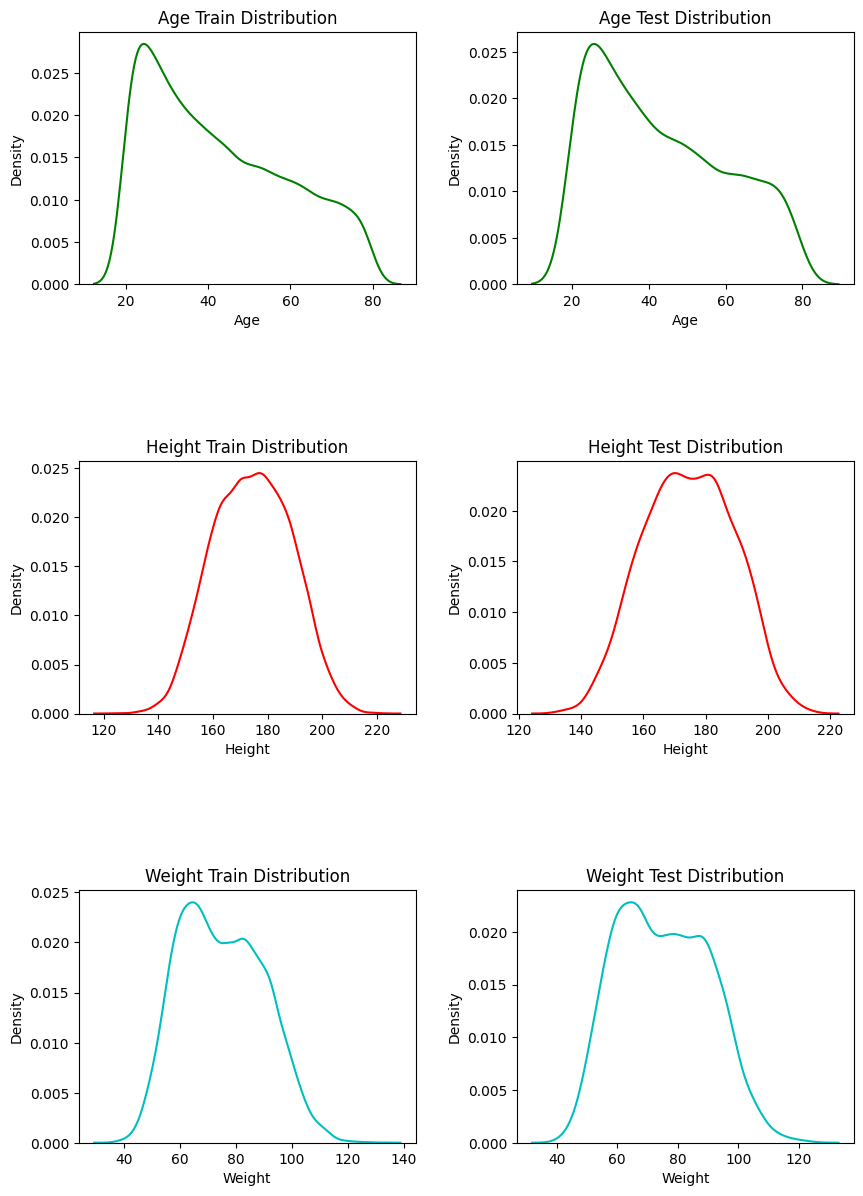

In [18]:
c = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b']
fig1, axes = plt.subplots(len(exercise_train_data.columns) // 2, 2, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
axes = axes.flatten()  # for using axes indices with one dimension array instead of two dimensions

for i, column, color in zip(range(0, len(exercise_train_data.columns), 2), exercise_train_data.columns, c):
    try:
        axes[i].title.set_text(column + " Train Distribution")
        sns.kdeplot(data=exercise_train_data, x=column, ax=axes[i], color=color)
    except:
        fig1.delaxes(axes[i])
        continue

for i, column, color in zip(range(1, len(exercise_train_data.columns), 2), exercise_train_data.columns, c):
    try:
        axes[i].title.set_text(column + " Test Distribution")
        sns.kdeplot(data=exercise_test_data, x=column, ax=axes[i], color=color)
    except:
        fig1.delaxes(axes[i])
        continue

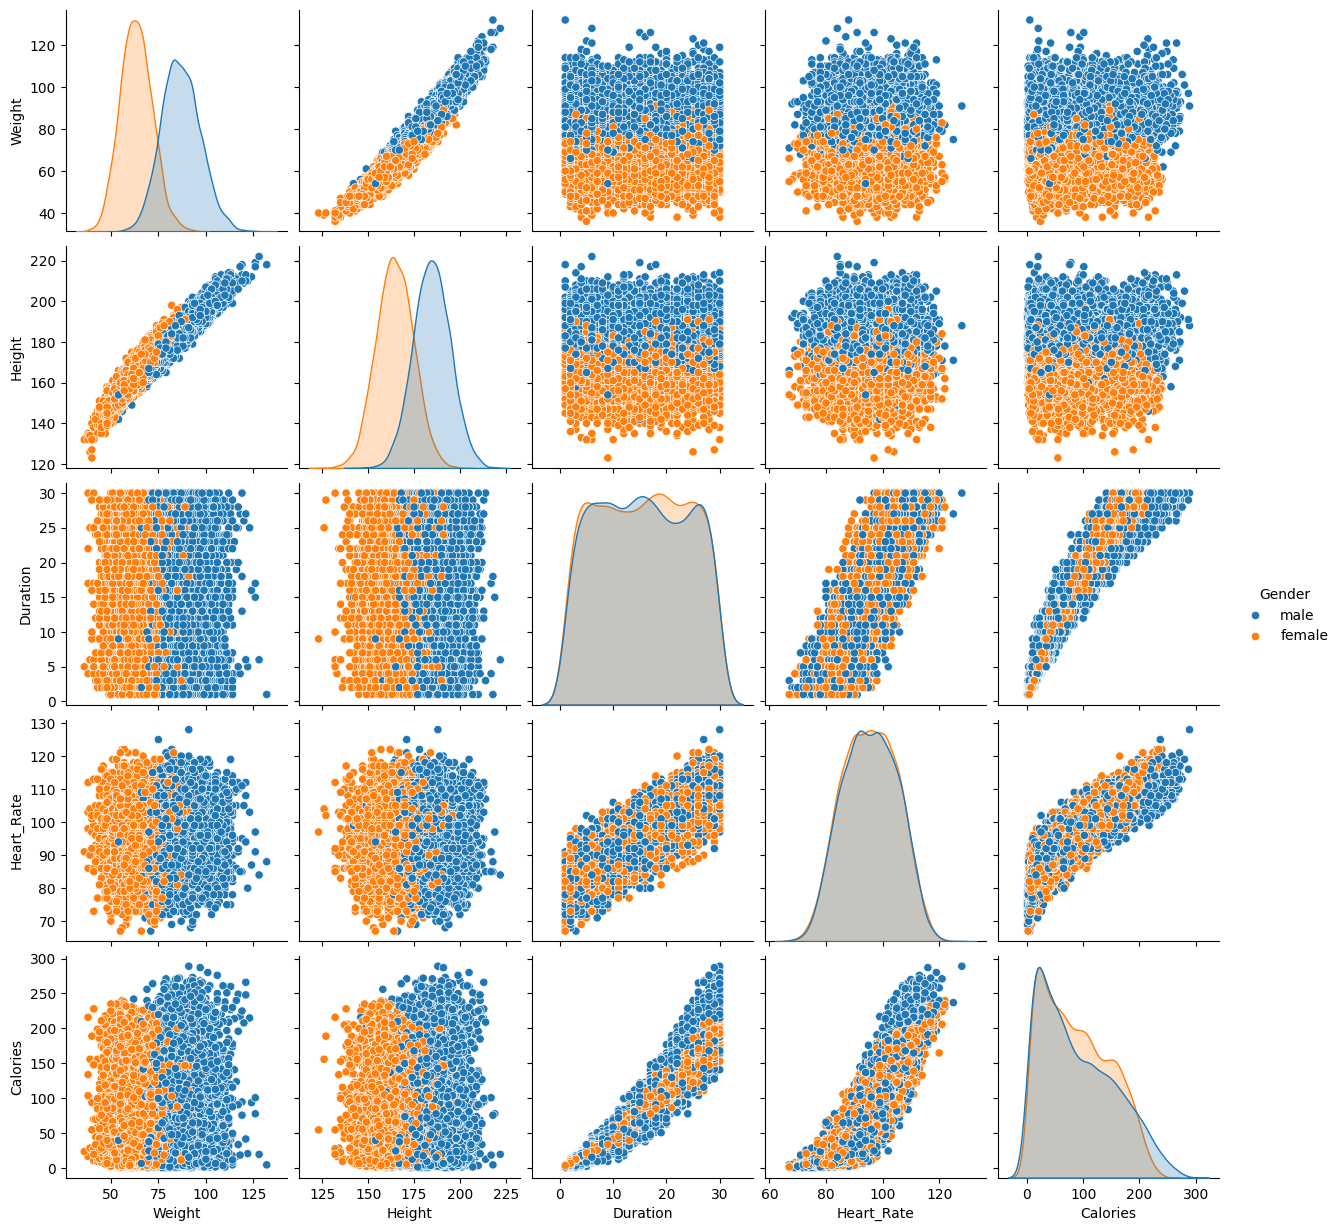

In [19]:
sns.pairplot(exercise_train_data[["Weight", "Height", "Duration", "Heart_Rate", "Calories", "Gender"]], hue="Gender")

In [20]:
print('Minimum age in dataset is: ', exercise_train_data["Age"].min())
print('Maximum age in dataset is: ', exercise_train_data["Age"].max())

Minimum age in dataset is:  20
Maximum age in dataset is:  79


In [21]:
age_groups = ["Young", "Middle-Aged", "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"], bins=[20, 40, 60, 80], right=False, labels=age_groups)
exercise_train_data["age_groups"].head()

2643             Old
13352            Old
13117            Old
2560             Old
14297    Middle-Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [22]:
exercise_train_data["age_groups"].value_counts()

age_groups
Young          6029
Middle-Aged    3535
Old            2436
Name: count, dtype: int64

<Axes: xlabel='age_groups', ylabel='count'>

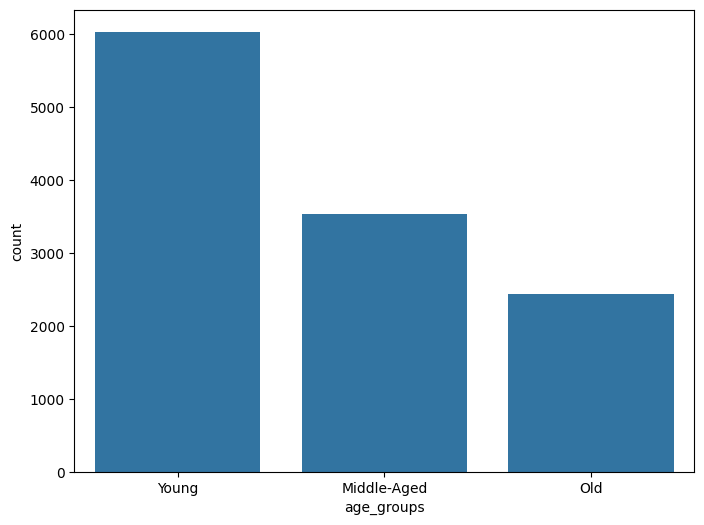

In [23]:
plt.rcParams['figure.figsize'] = 8, 6
sns.countplot(data=exercise_train_data, x="age_groups")

In [24]:
fig = px.box(exercise_train_data, x="age_groups", y="Calories", color="Gender")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [25]:
fig = px.box(exercise_train_data, x="age_groups", y="Duration", color="Gender")

fig.update_layout(
    width=750,
    height=450,
)

fig.show()

In [26]:
print("dataset's median exercise duration in mins:", exercise_train_data["Duration"].median())
print("dataset's mean exercise duration in mins:", exercise_train_data["Duration"].mean())

dataset's median exercise duration in mins: 16.0
dataset's mean exercise duration in mins: 15.520083333333334


<Axes: xlabel='Gender', ylabel='count'>

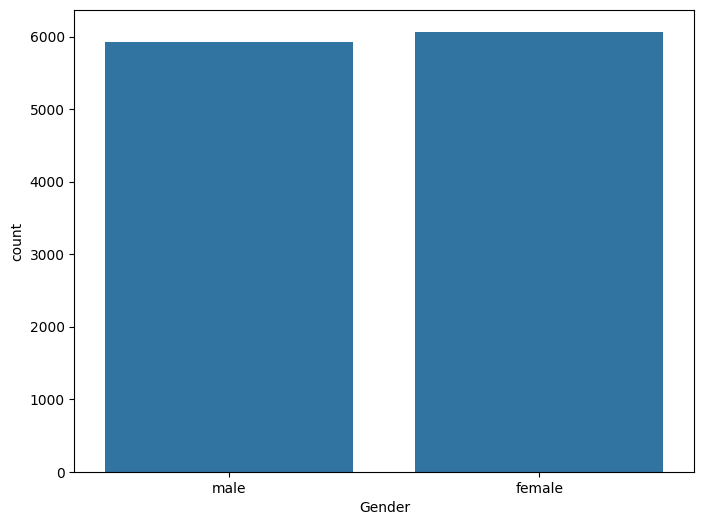

In [27]:
plt.rcParams["figure.figsize"] = 8, 6
sns.countplot(data=exercise_train_data, x="Gender")

In [28]:
fig = px.box(exercise_train_data, x="Gender", y="Duration")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [29]:
fig = px.box(exercise_train_data, x="Gender", y="Heart_Rate")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

In [30]:
for data in [exercise_train_data, exercise_test_data]:  # adding BMI column to both training and test sets
    data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
    data["BMI"] = round(data["BMI"], 2)

# exercise_test_data["BMI"] = exercise_test_data["Weight"] / ((exercise_test_data["Height"] / 100) ** 2)
# exercise_test_data["BMI"] = round(exercise_test_data["BMI"], 2)
# exercise_test_data.head()

In [33]:
# ... (Your previous code to calculate BMI) ...

print("Columns in exercise_train_data:", exercise_train_data.columns)
print("Is 'BMI' in columns?", 'BMI' in exercise_train_data.columns)  # Check if 'BMI' is there
print("First 5 rows of 'BMI' column:", exercise_train_data['BMI'].head()) # Check the values

Columns in exercise_train_data: Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'age_groups', 'BMI', 'categorized_BMI'],
      dtype='object')
Is 'BMI' in columns? True
First 5 rows of 'BMI' column: 2643     27.38
13352    25.06
13117    24.57
2560     26.15
14297    22.99
Name: BMI, dtype: float64


In [34]:
# ... (Your previous code to calculate BMI) ...

# Fill NaN values in 'BMI' with a default value (e.g., 0)
exercise_train_data['BMI'] = exercise_train_data['BMI'].fillna(0)

bmi_category = ["Very severely underweight", "Severely underweight", 
                "Underweight", "Normal", 
                "Overweight", "Obese Class I", 
                "Obese Class II", "Obese Class III"]

exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"], bins=[0, 15, 16, 18.5, 25, 30, 35, 40, 50], right=False, labels=bmi_category)

print(exercise_train_data.columns) # check to see if the column exists.

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") # converting categorical dtype into "object"
exercise_train_data.head()

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'age_groups', 'BMI', 'categorized_BMI',
       'Categorized_BMI'],
      dtype='object')


Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
2643     male   62   172.0    81.0      14.0        88.0       40.5      68.0   
13352    male   77   182.0    83.0      28.0       108.0       40.8     241.0   
13117  female   73   170.0    71.0      16.0        91.0       40.2      83.0   
2560     male   76   176.0    81.0      24.0        94.0       40.7     154.0   
14297    male   42   183.0    77.0       7.0        93.0       39.8      32.0   

        age_groups    BMI categorized_BMI Categorized_BMI  
2643           Old  27.38      Overweight      Overweight  
13352          Old  25.06      Overweight      Overweight  
13117          Old  24.57          Normal          Normal  
2560           Old  26.15      Overweight      Overweight  
14297  Middle-Aged  22.99          Normal          Normal

In [35]:
# ... (Your previous code) ...

try:
    exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"], bins=[0, 15, 16, 18.5, 25, 30, 35, 40, 50], right=False, labels=bmi_category)
    print("pd.cut was successful.")
except ValueError as e:
    print(f"Error in pd.cut: {e}") 
    print("Min BMI:", exercise_train_data["BMI"].min())
    print("Max BMI:", exercise_train_data["BMI"].max())

print(exercise_train_data.columns) # check to see if the column exists.

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") # converting categorical dtype into "object"
exercise_train_data.head()

pd.cut was successful.
Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'age_groups', 'BMI', 'categorized_BMI',
       'Categorized_BMI'],
      dtype='object')


Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
2643     male   62   172.0    81.0      14.0        88.0       40.5      68.0   
13352    male   77   182.0    83.0      28.0       108.0       40.8     241.0   
13117  female   73   170.0    71.0      16.0        91.0       40.2      83.0   
2560     male   76   176.0    81.0      24.0        94.0       40.7     154.0   
14297    male   42   183.0    77.0       7.0        93.0       39.8      32.0   

        age_groups    BMI categorized_BMI Categorized_BMI  
2643           Old  27.38      Overweight      Overweight  
13352          Old  25.06      Overweight      Overweight  
13117          Old  24.57          Normal          Normal  
2560           Old  26.15      Overweight      Overweight  
14297  Middle-Aged  22.99          Normal          Normal

In [36]:
import pandas as pd

test_data = pd.DataFrame({'BMI': [17, 22, 31, 45, 12]})
bmi_category = ["Underweight", "Normal", "Overweight", "Obese", "Very Underweight"]

test_data["Categorized_BMI"] = pd.cut(test_data["BMI"], bins=[0, 18.5, 25, 30, 40, 50], right=False, labels=bmi_category)
print(test_data)

   BMI   Categorized_BMI
0   17       Underweight
1   22            Normal
2   31             Obese
3   45  Very Underweight
4   12       Underweight


In [37]:
bmi_category = ["Very severely underweight", "Severely underweight", 
                "Underweight", "Normal", 
                "Overweight", "Obese Class I", 
                "Obese Class II", "Obese Class III"]

exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"], bins=[0, 15, 16, 18.5, 25, 30, 35, 40, 50], right=False, labels=bmi_category)

print(exercise_train_data.columns) # check to see if the column exists.

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") # converting categorical dtype into "object"
exercise_train_data.head()

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'age_groups', 'BMI', 'categorized_BMI',
       'Categorized_BMI'],
      dtype='object')


Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
2643     male   62   172.0    81.0      14.0        88.0       40.5      68.0   
13352    male   77   182.0    83.0      28.0       108.0       40.8     241.0   
13117  female   73   170.0    71.0      16.0        91.0       40.2      83.0   
2560     male   76   176.0    81.0      24.0        94.0       40.7     154.0   
14297    male   42   183.0    77.0       7.0        93.0       39.8      32.0   

        age_groups    BMI categorized_BMI Categorized_BMI  
2643           Old  27.38      Overweight      Overweight  
13352          Old  25.06      Overweight      Overweight  
13117          Old  24.57          Normal          Normal  
2560           Old  26.15      Overweight      Overweight  
14297  Middle-Aged  22.99          Normal          Normal

In [38]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized BMI", "Count"]
ds

Categorized BMI  Count
0          Normal   7819
1      Overweight   4181

In [39]:
ds = exercise_train_data[["Gender", "Categorized_BMI"]].value_counts().reset_index().sort_values(by=["Gender", "Categorized_BMI"])
ds.columns = ["Gender", "Categorized_BMI", "Count"]
ds

Gender Categorized_BMI  Count
0  female          Normal   5572
3  female      Overweight    496
2    male          Normal   2247
1    male      Overweight   3685

<Axes: xlabel='Categorized_BMI', ylabel='Count'>

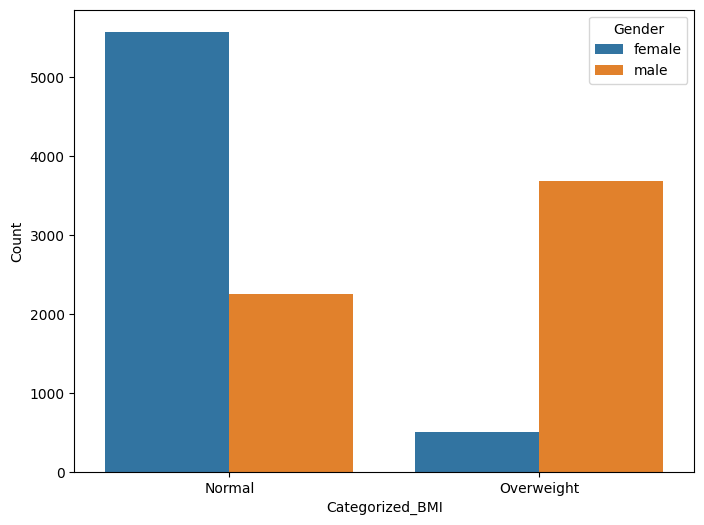

In [43]:
plt.rcParams["figure.figsize"] = 8, 6
sns.barplot(data=ds, x="Categorized_BMI", y="Count", hue="Gender")

In [44]:
ds = exercise_train_data[["age_groups", "Categorized_BMI"]].value_counts().reset_index().sort_values(by=["age_groups", "Categorized_BMI"])
ds.columns = ["age_groups", "Categorized_BMI", "Count"]
ds

age_groups Categorized_BMI  Count
0        Young          Normal   4369
2        Young      Overweight   1660
1  Middle-Aged          Normal   2197
3  Middle-Aged      Overweight   1338
4          Old          Normal   1253
5          Old      Overweight   1183

<Axes: xlabel='Categorized_BMI', ylabel='Count'>

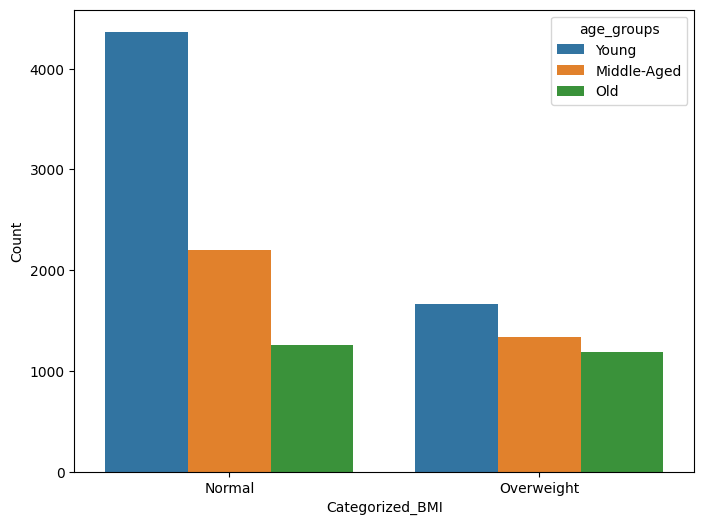

In [45]:
plt.rcParams["figure.figsize"] = 8, 6
sns.barplot(data=ds, x="Categorized_BMI", y="Count", hue="age_groups")

In [102]:
fig = px.scatter(exercise_train_data, x="Duration", y="Body_Temp", size="Calories")

fig.update_layout(
    width=700,
    height=450,
)

fig.show()

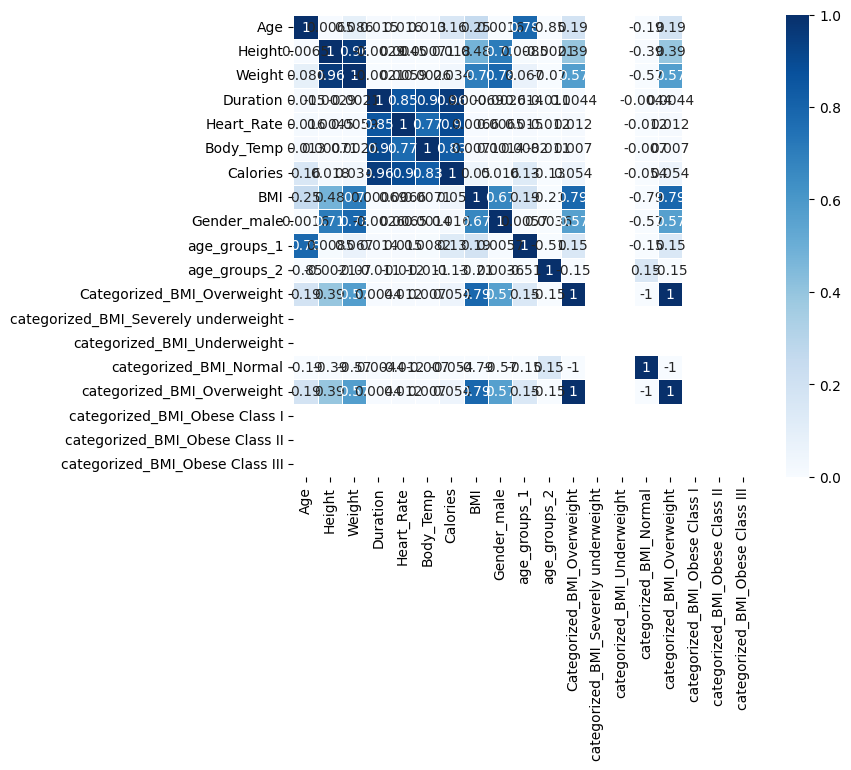

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming exercise_train_data exists...

# One-hot encode "categorized_BMI"
exercise_train_data = pd.get_dummies(exercise_train_data, columns=['categorized_BMI'], drop_first=True)

# Calculate and plot the correlation heatmap
plt.rcParams["figure.figsize"] = 8, 6
corr = exercise_train_data.corr()
sns.heatmap(corr, annot=True, square=True, linewidth=.5, vmin=0, vmax=1, cmap='Blues')
plt.show()

In [80]:
exercise_test_data = exercise_test_data[["Gender_male", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]

In [82]:
import pandas as pd

# Assuming exercise_train_data and exercise_test_data exist...

# Adjust exercise_train_data selection
exercise_train_data = exercise_train_data[["Gender_male", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]

# One-hot encoding of Gender is already done in exercise_test_data.
# So, remove the redundant get_dummies call
# exercise_test_data = pd.get_dummies(exercise_test_data, columns=['Gender'], drop_first=True)

# Adjust exercise_test_data selection
exercise_test_data = exercise_test_data[["Gender_male", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]

# One-hot encode other columns
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first=True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first=True)

In [86]:
exercise_train_data = exercise_train_data[["Gender_male", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]

In [89]:
import pandas as pd

# Assuming exercise_train_data exists...

print("Columns in exercise_train_data:", exercise_train_data.columns)

# Use Gender_male instead of Gender
exercise_train_data = exercise_train_data[["Gender_male", "Age", "BMI", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]

# Continue with your other code...

Columns in exercise_train_data: Index(['Gender_male', 'Age', 'BMI', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')


In [90]:
X_train = exercise_train_data.drop("Calories", axis=1)
y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop("Calories", axis=1)
y_test = exercise_test_data["Calories"]

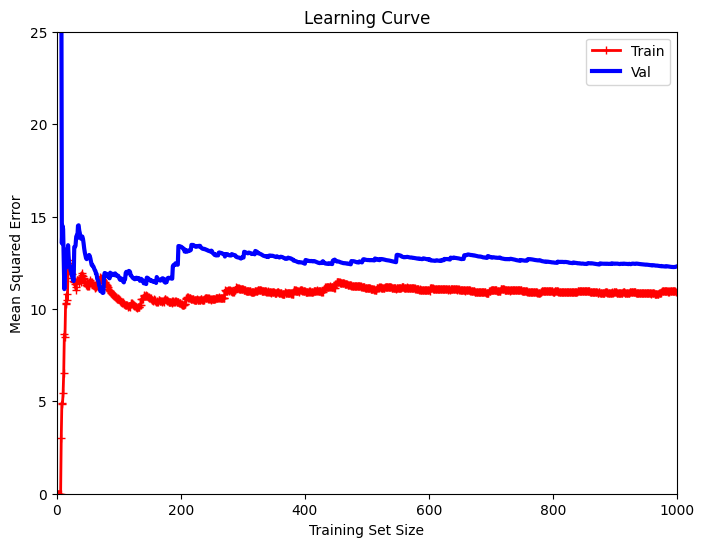

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_errors, val_errors = [], []

def plot_learning_curve(model):
    for m in range(1, 1000):
        model.fit(X_train[:m], y_train[:m])  # Corrected slicing
        y_train_predict = model.predict(X_train[:m])  # Corrected slicing
        y_val_predict = model.predict(X_test[:m])  # Corrected slicing

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))  # Corrected slicing
        val_errors.append(mean_squared_error(y_test[:m], y_val_predict))  # Corrected slicing

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.xlim([0, 1000])
    plt.ylim([0, 25])  # Corrected ylim
    plt.legend()

linreg = LinearRegression()
plot_learning_curve(linreg)
plt.show()  # Added plt.show()

In [94]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_prediction = linreg.predict(X_test)

In [95]:
import numpy as np
from sklearn import metrics

print("Linear Regression Mean Absolute Error (MAE):", round(metrics.mean_absolute_error(y_test, linreg_prediction), 2))
print("Linear Regression Mean Squared Error (MSE):", round(metrics.mean_squared_error(y_test, linreg_prediction), 2))
print("Linear Regression Root Mean Squared Error (RMSE):", round(np.sqrt(metrics.mean_squared_error(y_test, linreg_prediction)), 2))

Linear Regression Mean Absolute Error (MAE): 8.52
Linear Regression Mean Squared Error (MSE): 140.08
Linear Regression Root Mean Squared Error (RMSE): 11.84


In [96]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor(n_estimators=1000, max_features=3, max_depth=6)
random_reg.fit(X_train, y_train)
random_reg_prediction = random_reg.predict(X_test)

In [97]:
import numpy as np
from sklearn import metrics

print("Random Forest Mean Absolute Error (MAE):", round(metrics.mean_absolute_error(y_test, random_reg_prediction), 2))
print("Random Forest Mean Squared Error (MSE):", round(metrics.mean_squared_error(y_test, random_reg_prediction), 2))
print("Random Forest Root Mean Squared Error (RMSE):", round(np.sqrt(metrics.mean_squared_error(y_test, random_reg_prediction)), 2))

Random Forest Mean Absolute Error (MAE): 5.34
Random Forest Mean Squared Error (MSE): 69.31
Random Forest Root Mean Squared Error (RMSE): 8.33


In [98]:
exercise_train_data.iloc[32]

Gender_male     True
Age               23
BMI            24.88
Duration        27.0
Heart_Rate     102.0
Body_Temp       40.3
Calories       140.0
Name: 5897, dtype: object

In [101]:
import numpy as np

X_array = np.array([[24, 25, 28, 100, 40, 1]]).reshape(1, -1)  # Corrected double brackets
y_pred = random_reg.predict(X_array)

print("Prediction:", round(y_pred[0], 2))

Prediction: 111.03
